<ul>
    <li>datetime should be divided to 3 cols month , day, hour , year is not included only 2016</li>
    <li>passenger_count from 1 -> 6 increasing 7,8,9 small number of trips and 0 has highest</li>
    <li>distance in meters using function in this notebook</li>
    <li>remove id of trip</li>
    <li>store_and_forward and vendor need further analysis</li>
    <li>calculate speed to remove some outliers</li>
</ul>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("../Data/train.csv")
df.head(5)
#date should be divided int o year , month , day, hour if year is all 2016 delete it

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
len(df)

1458644

In [34]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [35]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
df["vendor_id"].nunique()

2

In [8]:
df["passenger_count"].nunique()

10

In [11]:
df["pickup_datetime"].nunique()

1380222

In [12]:
df["pickup_datetime"].value_counts()

2016-02-09 21:03:38    5
2016-03-04 08:07:34    5
2016-06-10 23:17:17    5
2016-01-12 18:48:44    5
2016-04-05 18:55:21    5
                      ..
2016-01-25 22:14:41    1
2016-05-31 11:05:10    1
2016-04-28 13:10:22    1
2016-06-15 09:34:49    1
2016-05-31 19:37:10    1
Name: pickup_datetime, Length: 1380222, dtype: int64

In [19]:
datetime = np.array(df["pickup_datetime"])
print(datetime[0])
date = [yy_mm_dy.split()[0] for yy_mm_dy in datetime]
print(date[0])


2016-03-14 17:24:55
2016-03-14


AttributeError: 'list' object has no attribute 'unique'

In [23]:
years = np.array([year.split('-')[0] for year in date])
print(np.unique(years))
#only 2016 occurs should be removed

['2016']


<BarContainer object of 10 artists>

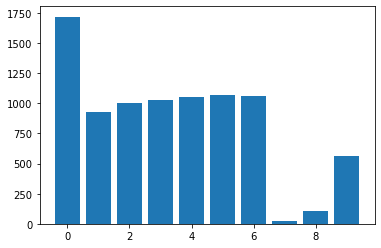

In [33]:
count = sorted(df["passenger_count"].unique())
count_values = list()
for pass_count in count:
    count_values.append(df[ df["passenger_count"] == pass_count].trip_duration.mean())
plt.bar(count,count_values)


In [38]:
print(len(df[df["vendor_id"] == 1]))
print(len(df[df["vendor_id"] == 2]))
df.head(1)

678342
780302


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455


In [42]:
x = abs(df["pickup_longitude"]-df["dropoff_longitude"])
print(x[0])

0.01752471923826704


In [57]:
def getDistanceFromLatLonInKm(lat1,lon1,lat2,lon2):
    R = 6371; 
    dLat = np.deg2rad(lat2-lat1);  
    dLon = np.deg2rad(lon2-lon1); 
    a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(np.deg2rad(lat1)) * np.cos(np.deg2rad(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    return d
print(df["pickup_longitude"][x.argmax()])
print(df["dropoff_longitude"][x.argmax()])
print(df["pickup_latitude"][x.argmax()])
print(df["dropoff_latitude"][x.argmax()])
print(df["trip_duration"][x.argmax()])

-71.79989624023438
-79.35283660888672
35.0815315246582
40.436328887939446
611


891.2141032500344

In [60]:
distance = list()
time = np.array(df["trip_duration"])
for row in np.array(df[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]]):
    distance.append(getDistanceFromLatLonInKm(row[1],row[0],row[3],row[2])*1000)
speed = distance/time
print(max(speed))

2576.3435364562606


In [67]:
distance = sorted(distance)
print(distance[:10])
speed = sorted(speed,reverse=True)
print((speed))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
4.006446935889385
